<a href="https://colab.research.google.com/github/rajeshkpandey/AWESOME-FER/blob/master/Epidemics_ABM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

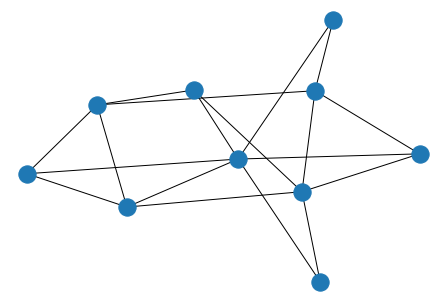

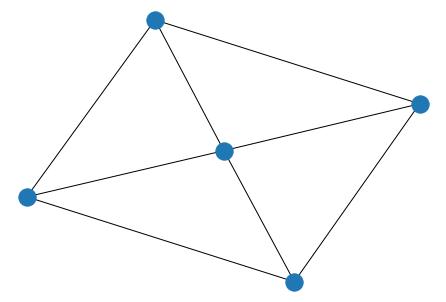

In [1]:
#Erdos-Renyi Graph in Networkx
import random
from networkx import nx
import matplotlib.pyplot as plt

N = 10  # 10 nodes
K = 100  # 100 agents
#M = 30  # 30 edges
NN = 5


#Graph = nx.gnm_random_graph(N, M)

P = 0.4 #Probabibilty for Node Connection in random graph
PP = 0.7
Graph = nx.erdos_renyi_graph(N,P) # Use Networkx to generate a random graph of N nodes being connected with probability P.
GraphN = nx.erdos_renyi_graph(NN,PP)


# some network properties
#print("the adjacency list")
#for line in nx.generate_adjlist(Graph):
#    print(line)

nx.draw(Graph)
plt.show()
nx.draw(GraphN)
plt.show()

In [2]:
A = nx.adjacency_matrix(Graph)
Adjacency_matrix = A.todense()
AN = nx.adjacency_matrix(GraphN)
Adjacency_matrixN = AN.todense()
print(Adjacency_matrix)
print(Adjacency_matrixN)

[[0 1 0 0 1 0 0 1 1 0]
 [1 0 1 0 0 0 1 0 0 0]
 [0 1 0 1 0 1 0 1 1 1]
 [0 0 1 0 1 0 0 0 0 0]
 [1 0 0 1 0 1 1 0 0 0]
 [0 0 1 0 1 0 1 0 0 0]
 [0 1 0 0 1 1 0 1 0 1]
 [1 0 1 0 0 0 1 0 1 0]
 [1 0 1 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 1 0 0 0]]
[[0 1 0 1 1]
 [1 0 1 0 1]
 [0 1 0 1 1]
 [1 0 1 0 1]
 [1 1 1 1 0]]


In [3]:
#Empty Node Dictionary [ A Dictionary consisting list of agent states on Graph Nodes]
Node = {}
print(Node)
for i in range(N):
  for j in range(NN):
    Node[i*NN+j] = list()
print(Node)
print(len(Node))


{}
{0: [], 1: [], 2: [], 3: [], 4: [], 5: [], 6: [], 7: [], 8: [], 9: [], 10: [], 11: [], 12: [], 13: [], 14: [], 15: [], 16: [], 17: [], 18: [], 19: [], 20: [], 21: [], 22: [], 23: [], 24: [], 25: [], 26: [], 27: [], 28: [], 29: [], 30: [], 31: [], 32: [], 33: [], 34: [], 35: [], 36: [], 37: [], 38: [], 39: [], 40: [], 41: [], 42: [], 43: [], 44: [], 45: [], 46: [], 47: [], 48: [], 49: []}
50


In [4]:
#Adding Virus_presence Randomly
for i in range(N):
  for j in range(NN):
    Virus_strength=random.uniform(0,1)
    Node[i*NN+j].append({'Virus' : Virus_strength})
print(Node)
print(len(Node))


{0: [{'Virus': 0.9748194554003093}], 1: [{'Virus': 0.8034899263803343}], 2: [{'Virus': 0.07627749764092961}], 3: [{'Virus': 0.5960294836324347}], 4: [{'Virus': 0.1990611765466973}], 5: [{'Virus': 0.24723485724273542}], 6: [{'Virus': 0.6067013966300013}], 7: [{'Virus': 0.05717366849617189}], 8: [{'Virus': 0.9743294776304162}], 9: [{'Virus': 0.4740827283911382}], 10: [{'Virus': 0.21949532531068783}], 11: [{'Virus': 0.9048998425432011}], 12: [{'Virus': 0.756183885805212}], 13: [{'Virus': 0.36718385351225025}], 14: [{'Virus': 0.24947273065595243}], 15: [{'Virus': 0.9510339495077921}], 16: [{'Virus': 0.927239137637812}], 17: [{'Virus': 0.3190329983424858}], 18: [{'Virus': 0.5520897097454786}], 19: [{'Virus': 0.5967626506688368}], 20: [{'Virus': 0.29388238546671364}], 21: [{'Virus': 0.25145044664248517}], 22: [{'Virus': 0.9926459810226335}], 23: [{'Virus': 0.16918141692583843}], 24: [{'Virus': 0.8651681374789197}], 25: [{'Virus': 0.7497487394813278}], 26: [{'Virus': 0.15963936120458588}], 27

In [5]:
#Initailizing randomly infection state [0 shows Recovered, 1 shows Susceptible, and 2 shows Infected]
Agent = {}
for k in range(K):
  Agent[k] = list() 
for k in range(K):
  rand_node=random.randint(0,N-1)
  rand_nodeN=random.randint(0,NN-1)
  rand_state=random.randint(0,2)
  Node[rand_node*NN+rand_nodeN].append({k : rand_state})
  Agent[k].append({'state' : rand_state})
  Agent[k].append({'orig_node' : rand_node})
  Agent[k].append({'orig_nodeN' : rand_nodeN})
  neigh_node = random.choice(list(Graph.neighbors(rand_node)))
  neigh_nodeN = random.choice(list(GraphN.neighbors(rand_nodeN)))
  Agent[k].append({'neigh_node' : neigh_node})
  Agent[k].append({'neigh_nodeN' : neigh_nodeN})
  neighN_node = random.choice(list(Graph.neighbors(neigh_node)))
  neighN_nodeN = random.choice(list(GraphN.neighbors(neigh_nodeN)))
  Agent[k].append({'neighN_node' : neighN_node})
  Agent[k].append({'neighN_nodeN' : neighN_nodeN})
print(Node)
print(Agent)

{0: [{'Virus': 0.9748194554003093}, {21: 2}, {55: 0}, {82: 2}], 1: [{'Virus': 0.8034899263803343}, {3: 1}, {37: 0}], 2: [{'Virus': 0.07627749764092961}, {14: 2}, {20: 0}, {43: 1}, {62: 0}, {69: 0}], 3: [{'Virus': 0.5960294836324347}, {86: 2}], 4: [{'Virus': 0.1990611765466973}, {13: 0}, {42: 0}, {54: 2}, {60: 0}, {65: 0}, {79: 0}, {80: 0}, {95: 2}], 5: [{'Virus': 0.24723485724273542}, {18: 0}, {53: 1}, {89: 0}], 6: [{'Virus': 0.6067013966300013}], 7: [{'Virus': 0.05717366849617189}, {2: 2}, {67: 2}], 8: [{'Virus': 0.9743294776304162}, {30: 1}, {45: 0}], 9: [{'Virus': 0.4740827283911382}], 10: [{'Virus': 0.21949532531068783}, {1: 0}, {39: 1}, {50: 2}, {88: 2}], 11: [{'Virus': 0.9048998425432011}, {10: 0}], 12: [{'Virus': 0.756183885805212}, {15: 1}, {38: 1}], 13: [{'Virus': 0.36718385351225025}, {23: 1}, {35: 0}, {98: 2}], 14: [{'Virus': 0.24947273065595243}, {77: 0}], 15: [{'Virus': 0.9510339495077921}, {12: 0}, {49: 0}, {66: 2}], 16: [{'Virus': 0.927239137637812}, {7: 0}, {25: 0}, {46

In [6]:
print(len(Graph.nodes))
print(len(GraphN.nodes))

10
5


In [7]:
#Random Walk Implementation
def random_walk(Graph=Graph, GraphN=GraphN, Node=Node, num_walks=1, num_steps=1):
    walks = list()
    Node_next = {}
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j] = list() 
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        Node_next[i*len(GraphN.nodes)+j].append(Node[i*len(GraphN.nodes)+j][0])
    for i in range(len(Graph.nodes)):
      for j in range(len(GraphN.nodes)):
        for agent in list(range(1,len(Node[i*len(GraphN.nodes)+j]))):
          print(Node[i*len(GraphN.nodes)+j][agent])
          for walk in range(num_walks):
              curr_walk = [i*len(GraphN.nodes)+j]
              cur = i*len(GraphN.nodes)+j
              for step in range(num_steps):
                  neighbors = list(Graph.neighbors(i))
                  neighborsn = list(GraphN.neighbors(j))
                  neighbors.append(i) #including no movement case
                  neighborsn.append(j)
                  possible_moves=neighbors 
                  possible_movesn=neighborsn
                  if len(possible_moves) > 0:
                      next = random.choice(possible_moves)
                  if len(possible_movesn) > 0:                     
                      nextn = random.choice(possible_movesn)
                  nex = next*len(GraphN.nodes)+nextn
          Node_next[nex].append(Node[cur][agent])
          curr_walk.append(nex)
          #print(curr_walk)
          walks.append(nex)
    return Node,Node_next

In [8]:
Node_n=Node.copy() 
for i in range(10):
  Node_p,Node_n = random_walk(Graph,GraphN,Node_n,1,1) 
  count=0
  for i in range(len(Node_p)):
    count+=len(Node_p[i]) - 1
  print(count)
  print(Node_p)
  print(Node_n)


{21: 2}
{55: 0}
{82: 2}
{3: 1}
{37: 0}
{14: 2}
{20: 0}
{43: 1}
{62: 0}
{69: 0}
{86: 2}
{13: 0}
{42: 0}
{54: 2}
{60: 0}
{65: 0}
{79: 0}
{80: 0}
{95: 2}
{18: 0}
{53: 1}
{89: 0}
{2: 2}
{67: 2}
{30: 1}
{45: 0}
{1: 0}
{39: 1}
{50: 2}
{88: 2}
{10: 0}
{15: 1}
{38: 1}
{23: 1}
{35: 0}
{98: 2}
{77: 0}
{12: 0}
{49: 0}
{66: 2}
{7: 0}
{25: 0}
{46: 0}
{59: 0}
{84: 2}
{11: 1}
{58: 2}
{75: 2}
{81: 1}
{94: 0}
{44: 0}
{4: 0}
{9: 0}
{33: 0}
{97: 2}
{29: 1}
{93: 1}
{47: 2}
{90: 1}
{51: 2}
{56: 1}
{68: 2}
{76: 2}
{26: 2}
{57: 2}
{17: 1}
{19: 1}
{70: 1}
{99: 0}
{24: 0}
{31: 2}
{36: 0}
{48: 0}
{52: 0}
{96: 1}
{74: 0}
{32: 1}
{5: 1}
{34: 2}
{64: 1}
{87: 1}
{92: 1}
{40: 2}
{0: 1}
{6: 1}
{71: 0}
{83: 2}
{91: 0}
{16: 0}
{73: 0}
{85: 2}
{8: 2}
{27: 0}
{78: 0}
{61: 0}
{72: 2}
{22: 2}
{28: 0}
{41: 0}
{63: 2}
100
{0: [{'Virus': 0.9748194554003093}, {21: 2}, {55: 0}, {82: 2}], 1: [{'Virus': 0.8034899263803343}, {3: 1}, {37: 0}], 2: [{'Virus': 0.07627749764092961}, {14: 2}, {20: 0}, {43: 1}, {62: 0}, {69: 0}], 3: [{'V